In [57]:
from matplotlib import pyplot
import numpy as np
import seaborn as sns

In [58]:
def find_gauss_broder(beta, step = 0.01):
    nado = 1/((np.pi*2)**0.5)
    sum = 0
    x = 0
    def plotnost(x):
        return nado * np.exp((-x**2) / 2)
    while sum < beta/2 :
        sum += plotnost(x) * step
        x += step
    return x, -x

In [69]:
n = 100
theta = 250
beta = 0.95
f1, f2 = np.zeros(4, dtype = np.float64), np.zeros(4, dtype = np.float64)

In [70]:
x = np.random.randint(theta, 2*theta, size = n)

# Точный


In [71]:
xmax = np.max(x)
f1[0] = xmax / (1 + (1/2 + beta/2)**(1/n))
f2[0] = xmax / (1 + (1/2 - beta/2)**(1/n))

print(f1[0], " < \u03F4 < ", f2[0])


249.0315206707721  < ϴ <  253.59213419060777


# Ассимптотический

### ОММ

In [72]:
e1, e2 = find_gauss_broder(0.95, step = 0.001)
a1 = np.mean(x)
mark = a1*2/3

a2 = 0
for i in range (0, n):
    a2 += 1/n*(x[i])**2
    
const = (4/9 * (a2 - a1**2))**0.5 / n**0.5

f1[1] = mark - e1 * const
f2[1] = mark - e2 * const


print(f1[1], " < \u03F4 < ", f2[1])

245.0813344395071  < ϴ <  263.3053322271596


### ОМП

In [73]:
e1, e2 = find_gauss_broder(0.95, step = 0.001)
mark = np.max(x) / 2

f1[2] = mark*(1-e1/n**0.5)
f2[2] = mark*(1-e2/n**0.5)

print(f1[2], " < \u03F4 < ", f2[2])

200.24580000000262  < ϴ <  297.7541999999974


# Bootstrap

In [77]:
thts = []
weird_theta = np.max(x)/2
for s in range (0, 1000):
    i = np.random.randint(0, n, n)
    xi = []
    for j in i:
        xi.append(x[j])

    thts.append(weird_theta - 2/3*np.mean(xi))
thts.sort()

f1[3] = thts[int((1/2-beta/2)*1000)] + weird_theta
f2[3] = thts[int((1/2 + beta/2)*1000)] + weird_theta
print(f1[3], " < \u03F4 < ", f2[3])

234.53333333333336  < ϴ <  253.14


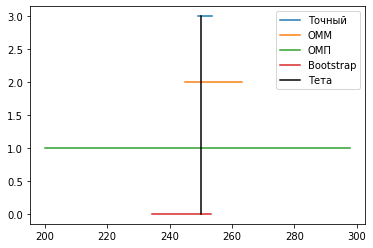

In [79]:
pyplot.plot([f1[0], f2[0]], [3, 3], label = "Точный")
pyplot.plot([f1[1], f2[1]], [2, 2], label = "ОММ")
pyplot.plot([f1[2], f2[2]], [1, 1], label = "ОМП")
pyplot.plot([f1[3], f2[3]], [0, 0], label = "Bootstrap")
pyplot.plot([theta, theta], [0, 3], color = "black", label = "Тета")

pyplot.legend()
pyplot.show()

Точный интервал самый точный, bootstrap и ассимптотический доверительные интервалы примерно одинаковы, а из-за того, что модель не регулярна, ОМП работает не точно